In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import *
import joblib
from tkinter import messagebox

In [3]:
#R Means 'Raw String' Normally, Python uses backslashes as escape characters. Prefacing the string definition with 'r' is a useful way to define a string where you need the backslash to be an actual backslash and not part of an escape code that means something else in the string.
df = pd.read_csv(r"C:\Users\Dell\Desktop\predictive_maintenance.csv")

In [4]:
df


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

<AxesSubplot:xlabel='Target', ylabel='count'>

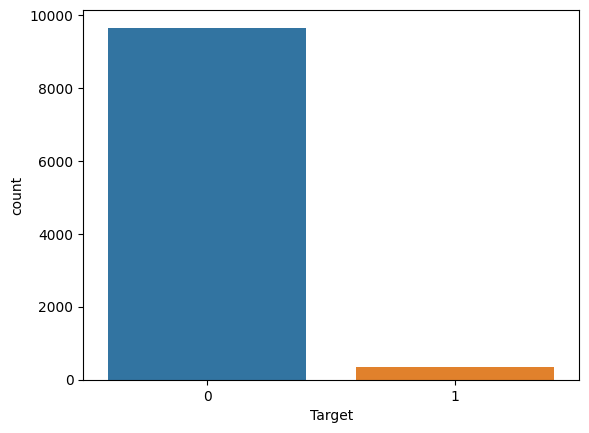

In [9]:
sns.countplot(x="Target" , data = df)
#count=df['Target'].value_counts()
#grp=df.groupby('Target').mean()
#print(count)
#print(grp)

In [10]:
df.isna()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

<AxesSubplot:>

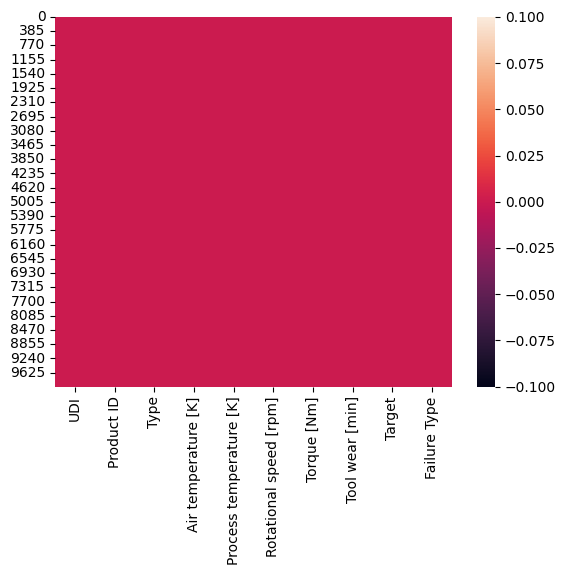

In [12]:
sns.heatmap(df.isna())

In [13]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
df.drop('UDI',axis=1,inplace=True)

In [15]:
df


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [16]:
df.drop('Product ID',axis=1,inplace=True)

In [17]:
df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [18]:
df.drop('Target',axis=1,inplace=True)

In [19]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


# Pre-processing

In [20]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
df['Type'] = lec.fit_transform(df['Type'])


In [21]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,No Failure
1,1,298.2,308.7,1408,46.3,3,No Failure
2,1,298.1,308.5,1498,49.4,5,No Failure
3,1,298.2,308.6,1433,39.5,7,No Failure
4,1,298.2,308.7,1408,40.0,9,No Failure


In [22]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,No Failure
1,1,298.2,308.7,1408,46.3,3,No Failure
2,1,298.1,308.5,1498,49.4,5,No Failure
3,1,298.2,308.6,1433,39.5,7,No Failure
4,1,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,No Failure
9996,0,298.9,308.4,1632,31.8,17,No Failure
9997,2,299.0,308.6,1645,33.4,22,No Failure
9998,0,299.0,308.7,1408,48.5,25,No Failure


In [23]:
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64

In [24]:
x = df.drop('Failure Type',axis=1)
y = df['Failure Type']

# Training a model

In [25]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9000, 6)
(1000, 6)
(9000,)
(1000,)


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

x_test=sc.fit_transform(x_test)
print(x_train)
print(x_test)
print(x_train.shape)
print(y_train.shape)

[[ 1.33509306e+00  7.45073062e-01  5.31407519e-01 -8.59548123e-01
   7.53402851e-01 -1.22064838e+00]
 [-2.00681698e+00 -1.80517702e+00 -1.83057031e+00  2.47979788e-03
  -2.56413323e-01 -5.15177004e-01]
 [-3.35861960e-01 -5.05049525e-01  1.93982115e-01  1.82664211e+00
  -1.59616943e+00  1.77368568e+00]
 ...
 [-3.35861960e-01 -2.20521624e+00 -2.64039127e+00 -3.64577252e-01
   1.23517515e-01  7.54671472e-01]
 [-3.35861960e-01  1.94519075e+00  2.08356438e+00 -1.27665841e+00
   2.29312256e+00  3.47065788e-01]
 [ 1.33509306e+00 -9.55093657e-01 -1.15571950e+00  7.81085662e-01
  -6.26345980e-01  1.20930858e+00]]
[[-0.30059453 -0.92836354 -1.42959334  0.19068596 -0.50594891  0.16416619]
 [ 1.32424077  1.16873046  0.70552226 -0.63573847  0.11513943  1.17368008]
 [ 1.32424077  2.01755422  1.83980242 -0.43487142  1.13993517  0.82115142]
 ...
 [ 1.32424077  1.21866127  0.77224462  2.03866281 -1.84128882  1.41404053]
 [-1.92542983  1.86776179  1.30602352 -1.14651468  1.29520726 -0.6851074 ]
 [ 1.324

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)
#import joblib and start working on tkinter


LogisticRegression()

In [29]:
y_prediction = lr.predict(x_test)
y_prediction
len(y_prediction)

1000

In [30]:

y_prediction

array(['No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Fa

In [31]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

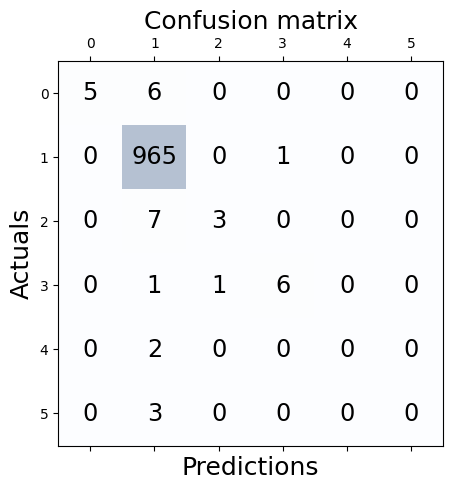

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_prediction)
fig , ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j , y=i , s=conf_matrix[i,j] , va = 'center' , ha='center' , size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals' , fontsize=18)
plt.title('Confusion matrix' , fontsize=18)
plt.show()


In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,y_prediction))

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.45      0.62        11
              No Failure       0.98      1.00      0.99       966
      Overstrain Failure       0.75      0.30      0.43        10
           Power Failure       0.86      0.75      0.80         8
         Random Failures       0.00      0.00      0.00         2
       Tool Wear Failure       0.00      0.00      0.00         3

                accuracy                           0.98      1000
               macro avg       0.60      0.42      0.47      1000
            weighted avg       0.97      0.98      0.97      1000



d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print(accuracy_score(y_test,y_prediction))

0.979


# M--> 2    L--> 1     H--> 0

In [37]:
result = lr.predict(x_test)
print(result)

['No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'No Failure' 'No Failure' 'No Failure' 'No Failure' 'No Failure'
 'Overstra

In [38]:
#or u can use a list and convert it into array
#list=(2,298.1,308.6,3551,42.8,25)
# then l = np.array(list)
#['Type','Air temp','Process Temp','RPM','Torque','Tool wear']
new_data_point = sc.transform([[2, 298.1, 308.6, 3551, 42.8, 25]])
result = lr.predict(new_data_point)
print(result)

['Power Failure']


d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [39]:
new_data_point = sc.transform([[1, 300.5, 309.8, 1379, 54.2, 307]])
result = lr.predict(new_data_point)
print(result)

['Overstrain Failure']


d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [40]:
new_data_point = sc.transform([[2, 298.1, 308.6, 1551, 42.8, 25]])
result = lr.predict(new_data_point)
print(result)

['No Failure']


d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
new_data_point = sc.transform([[2, 298.1, 308.6, 1551, 42.8, 425]])
result = lr.predict(new_data_point)
print(result)

['Tool Wear Failure']


d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [42]:
new_data_point = sc.transform([[2, 400, 308.6, 1551, 42.8,25]])
result = lr.predict(new_data_point)
print(result)

['Heat Dissipation Failure']


d:\python_project\predictive_maintenance\predictive_maintenance\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
